<a href="https://colab.research.google.com/github/Doubles2/LDCC/blob/master/Keras/part2_chap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mnist 예제
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units = 2,
                input_dim = 28*28,
                activation = 'relu'))

model.add(Dense(units = 10,
                activation = 'softmax'))

In [4]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [9]:
# 텐서보드 연동시키기
# You can change the directory name
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = 'tb_logs'

import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
 
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))
 
get_ipython().system_raw('./ngrok http 6006 &')
 
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

tb_hist = keras.callbacks.TensorBoard(log_dir = LOG_DIR,
                                      histogram_freq = 0,
                                      write_graph = True,
                                      write_images = True
                                      )

--2020-03-02 02:01:46--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.201.247.239, 3.95.127.176, 54.165.216.26, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.201.247.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  58.9MB/s    in 0.2s    

2020-03-02 02:01:47 (58.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://6ff81146.ngrok.io


In [10]:
# 4. 모델 학습시키기
hist = model.fit(x_train,
                 y_train,
                 epochs = 10,
                 batch_size = 10,
                 validation_data = (x_val, y_val),
                 callbacks = [tb_hist]
                 )

Train on 700 samples, validate on 300 samples
Epoch 1/10
700/700 [==============================] - 0s 162us/step - loss: 0.6269 - acc: 0.7786 - val_loss: 2.4797 - val_acc: 0.4567
Epoch 2/10
700/700 [==============================] - 0s 172us/step - loss: 0.6267 - acc: 0.7771 - val_loss: 2.5074 - val_acc: 0.4333
Epoch 3/10
700/700 [==============================] - 0s 165us/step - loss: 0.6265 - acc: 0.7786 - val_loss: 2.5348 - val_acc: 0.4367
Epoch 4/10
700/700 [==============================] - 0s 174us/step - loss: 0.6265 - acc: 0.7786 - val_loss: 2.4845 - val_acc: 0.4433
Epoch 5/10
700/700 [==============================] - 0s 157us/step - loss: 0.6263 - acc: 0.7786 - val_loss: 2.5123 - val_acc: 0.4367
Epoch 6/10
700/700 [==============================] - 0s 170us/step - loss: 0.6260 - acc: 0.7786 - val_loss: 2.4889 - val_acc: 0.4433
Epoch 7/10
700/700 [==============================] - 0s 154us/step - loss: 0.6258 - acc: 0.7786 - val_loss: 2.5163 - val_acc: 0.4333
Epoch 8/10
700/7

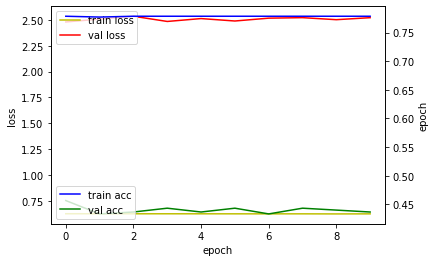

In [11]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],
             'y',
             label = 'train loss')

loss_ax.plot(hist.history['val_loss'],
             'r',
             label = 'val loss')

acc_ax.plot(hist.history['acc'],
             'b',
             label = 'train acc')

acc_ax.plot(hist.history['val_acc'],
             'g',
             label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('epoch')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [0]:
# # You can change the directory name

# LOG_DIR = 'tb_logs'
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip


--2020-02-28 01:08:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.193.139.214, 52.206.168.246, 54.165.216.26, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.193.139.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  16.5MB/s    in 0.8s    

2020-02-28 01:08:58 (16.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://7e199a9d.ngrok.io
